### ANALISIS DE LAS COMPAÑIAS DEL S&P500

In [1]:
import pandas as pd 
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


Descargo los Tickers de las compañias

In [ ]:
payload = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
df = pd.DataFrame(payload[0])
df['Symbol'] = df['Symbol'].str.replace(".", "-")
tickers_symbols = df['Symbol'].values.tolist()
GICS_sectors = df['GICS Sector'].values.tolist()

Con la libreria YFINANCE descargo la informacion de las compañias

In [ ]:
data = pd.DataFrame()
for t,s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start="2000-01-01", end="2021-12-31", progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    data = data.append(tmp, ignore_index=True)

#genera un csv para guardar la informacion si se descomenta
#data.to_csv('stock_prices.csv', sep=',')

In [4]:
#En caso que quiera cargar la data desde el csv creado
#data = pd.read_csv('..\PI_02\stock_prices.csv', delimiter = ',')
#data.drop(['Unnamed: 0'], axis = 'columns', inplace=True)

In [5]:
#Creo la columna dia_semana y creo columna close 2 aplicando la funcion shift al cierre
data['dia_semana'] = data['Date'].apply(pd.to_datetime).dt.dayofweek
data['close2']=data.shift(periods=1).Close


Creo las columnas GAPS, Intradiario, Variaciones y Volatilidad

In [6]:

#CALCULO RETORNO DE LOS GAPS
#retornos_gaps = np.log(aperturas/cierres.shift(1)).fillna(0)
data['GAP'] = data.apply(lambda row: np.log(row.Open/row.close2),
                         axis = 1).fillna(0)


In [7]:

for i in range(0,data.shape[0]-1):
    if data.loc[i,'Ticker']!= data.loc[i+1,'Ticker']:
            data['GAP'][i+1] = 0

data.drop(columns='close2', inplace=True)


C:\Users\maty_\AppData\Local\Temp\ipykernel_3332\282358571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GAP'][i+1] = 0


In [8]:

#CALCULO RETORNO INTRADIARIO
#retornos_intra = np.log(cierres/aperturas).fillna(0)
data['Intradiario'] =data.apply(lambda row: np.log(row.Close/row.Open),
                                axis=1).fillna(0)


In [9]:

## CALCULO DE VARIACIONES
# Variaciones = activo.cierre_ajustado.pct_change()
data['Variaciones'] = data['Adj Close'].pct_change()


In [10]:

for i in range(0,data.shape[0]-1):
    if data.loc[i,'Ticker']!= data.loc[i+1,'Ticker']:
            data['Variaciones'][i+1] = 0

data['Variaciones'].fillna(0, inplace=True)


C:\Users\maty_\AppData\Local\Temp\ipykernel_3332\3704149474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Variaciones'][i+1] = 0


In [11]:
#Calculo de Volatilidad
#volatilidad = activos.variaciones.rolling(250).std()*100*(250)**0.5 
data['Volatilidad']=(data['Variaciones'].rolling(250).std()*100*(250)**0.5).fillna(0)

Tabla data completa

In [12]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,dia_semana,GAP,Intradiario,Variaciones,Volatilidad
0,2000-01-03 00:00:00,48.03125,48.25000,47.03125,47.1875,26.434866,2173400.0,MMM,Industrials,0,0.000000,-0.017723,0.000000,0.0
1,2000-01-04 00:00:00,46.43750,47.40625,45.31250,45.3125,25.384453,2713800.0,MMM,Industrials,1,-0.016022,-0.024524,-0.039736,0.0
2,2000-01-05 00:00:00,45.56250,48.12500,45.56250,46.6250,26.119736,3699400.0,MMM,Industrials,2,0.005502,0.023052,0.028966,0.0
3,2000-01-06 00:00:00,47.15625,51.25000,47.15625,50.3750,28.220516,5975800.0,MMM,Industrials,3,0.011330,0.066028,0.080429,0.0
4,2000-01-07 00:00:00,50.56250,51.90625,49.96875,51.3750,28.780724,4101200.0,MMM,Industrials,4,0.003715,0.015941,0.019851,0.0


ANALISIS DE LOS INDICADORES

RETORNO GAP

RETORNO GAP (Histograma)

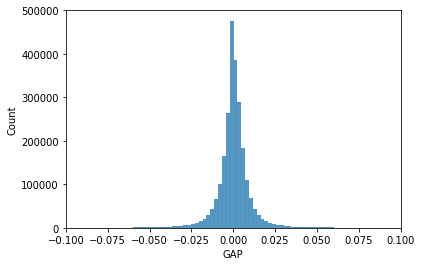

In [13]:
#Distplot para Retorno gap
fig = plt.figure()
ax = plt.axes()
sns.histplot(data["GAP"], bins=1000)
plt.xlim(-0.1, 0.1)
plt.show()

RETORNO GAP (Boxplot)

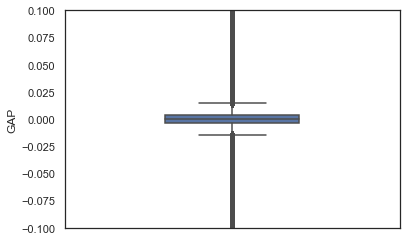

In [14]:
#Boxplot para Retorno GAP
sns.set_theme(style="white")
ax = sns.boxplot(y=data["GAP"])
plt.xlim(-1,1)
plt.ylim(-0.1,0.1)
plt.show()

RETORNO INTRADIARIO

RETORNO INTRADIARIO (Histograma)

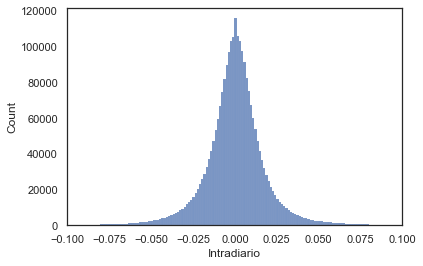

In [15]:
#Distplot para Retorno intradiario
fig = plt.figure()
ax = plt.axes()
sns.histplot(data["Intradiario"], bins=1000)
plt.xlim(-0.1, 0.1)
plt.show()

RETORNO INTRADIARIO (Boxplot)

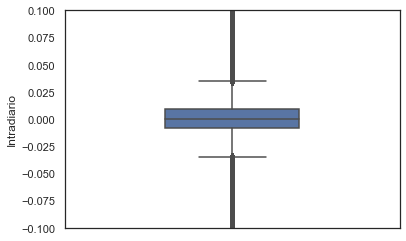

In [16]:
##Boxplot para Retorno Intradiario
sns.set_theme(style="white")
ax = sns.boxplot(y=data["Intradiario"])
plt.xlim(-1,1)
plt.ylim(-0.1,0.1)
plt.show()

VARIACIONES

VARIACIONES (Histograma)

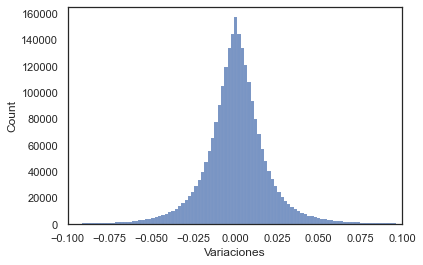

In [17]:
#Distplot para Variaciones
fig = plt.figure()
ax = plt.axes()
sns.histplot(data["Variaciones"], bins=1000)
plt.xlim(-0.1, 0.1)
plt.show()

VARIACIONES (Boxplot)

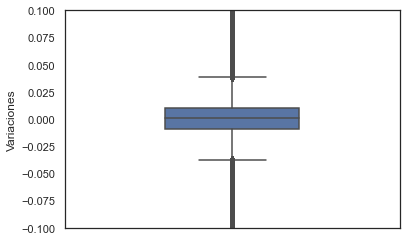

In [18]:
#Boxplot para Variaciones
sns.set_theme(style="white")
ax = sns.boxplot(y=data["Variaciones"])
plt.xlim(-1,1)
plt.ylim(-0.1,0.1)
plt.show()

VOLATILIDAD

VOLATILIDAD (Histograma)

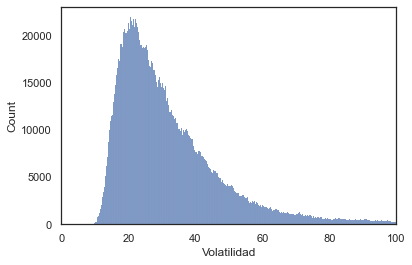

In [19]:
#Distplot para Volatilidad
fig = plt.figure()
ax = plt.axes()
sns.histplot(data["Volatilidad"], bins=1000)
plt.xlim(-0.1, 100)
plt.show()

VOLATILIDAD (Boxplot)

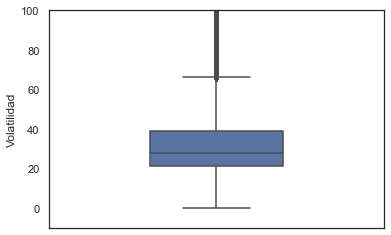

In [20]:
##Boxplot para Volatilidad
sns.set_theme(style="white")
ax = sns.boxplot(y=data["Volatilidad"])
plt.xlim(-1,1)
plt.ylim(-10,100)
plt.show()

### 1. ¿CUAL ES EL MEJOR DIA PARA INVERTIR DE ACUERDO AL MOVIMIENTO DE LOS RETORNOS GAP?

In [21]:
# MEJOR DIA PARA INVERTIR DE ACUERDO AL MOVIMIENTO DE LOS RETORNOS GAP
datagap= data.groupby('dia_semana')['GAP'].mean().reset_index()
dias = {'Lunes':0,'Martes':1 ,'Miercoles':2 ,'Jueves': 3, 'Viernes': 4}
datagap['dias'] = dias
datagap

,dia_semana,GAP,dias
0,0,0.000038,Lunes
1,1,0.000577,Martes
2,2,0.000116,Miercoles
3,3,0.000056,Jueves
4,4,0.000223,Viernes


In [22]:
fig = px.bar(datagap, x='dias', y='GAP', color='dias', hover_name='dias', color_discrete_sequence=["orange", "red", "green", "blue", "purple"],
title='MEJOR DIA PARA INVERTIR DE ACUERDO AL MOVIMIENTO DE LOS RETORNOS GAP')
fig.show()

Segun el retorno GAP el mejor dia para invertir va a ser el lunes porque el martes es el dia que mas alto abre.

### 2. MEJOR DIA PARA INVERTIR DE ACUERDO AL MOVIMIENTO DE LOS RETORNOS INTRADIARIOS


In [23]:
dataintra= data.groupby('dia_semana')['Intradiario'].mean().reset_index()
dias = {'Lunes':0,'Martes':1 ,'Miercoles':2 ,'Jueves': 3, 'Viernes': 4}
dataintra['dias'] = dias
dataintra


,dia_semana,Intradiario,dias
0,0,-0.000308,Lunes
1,1,0.000186,Martes
2,2,0.000242,Miercoles
3,3,0.000521,Jueves
4,4,0.000250,Viernes


In [24]:
fig = px.bar(dataintra, x='dias', y='Intradiario', color='dias', hover_name='dias', color_discrete_sequence=["orange", "red", "green", "blue", "purple"],
title='MEJOR DIA PARA INVERTIR DE ACUERDO AL MOVIMIENTO DE LOS RETORNOS INTRADIARIOS')
fig.show()

El mejor dia para invertir segun los movimientos del retorno intradiario es el Jueves al momento de apertura del mercado.

FILTROS DE DATOS POR AÑOS

In [25]:
ultimoanio= data[data["Date"] > '2020-12-31']
ultimos2anios= data[data["Date"] > '2019-12-31']

### 3. MEJORES INDUSTRIAS QUE PERTENECEN AL SP500 EN LAS QUE SE PUEDEN INVERTIR

MEJORES INDUSTRIAS PARA INVERTIR HISTORICAS

In [26]:
dataGicstotal = data.groupby('GICS')['Variaciones'].mean().reset_index()

Se puede ver en el primer grafico que las empresas que mas variaron en los 20 años de datos recopilados son: Information Technology, Consumer Discretionary y Health Care

In [27]:
dataGicstotal.T

,0,1,2,3,4,5,6,7,8,9,10
GICS,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Variaciones,0.000688,0.000879,0.000543,0.000669,0.000679,0.000822,0.000744,0.000886,0.000681,0.000771,0.000525


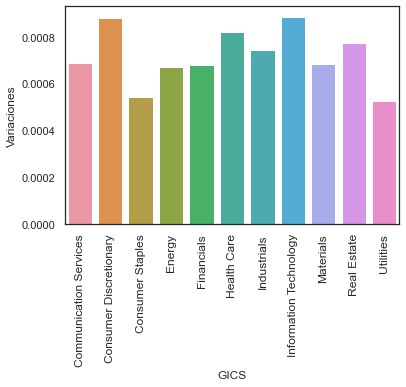

In [28]:
plt.xticks(fontsize=12,rotation=90)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data= dataGicstotal, x = 'GICS', y = "Variaciones")
plt.show()

MEJORES INDUSTRIAS PARA INVERTIR 2020-2022

En este segundo, se ve que las empresas que mas variaron en los 2 ultimos años de datos recopilados son: Information Technology, Consumer Discretionary y Materials

In [29]:
dataGicsultimos2=ultimos2anios.groupby('GICS').agg({'Variaciones':'mean'}).reset_index()

In [30]:
dataGicsultimos2.T

,0,1,2,3,4,5,6,7,8,9,10
GICS,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Variaciones,0.000848,0.001389,0.000597,0.001002,0.00107,0.001163,0.001042,0.001514,0.001211,0.00104,0.00045


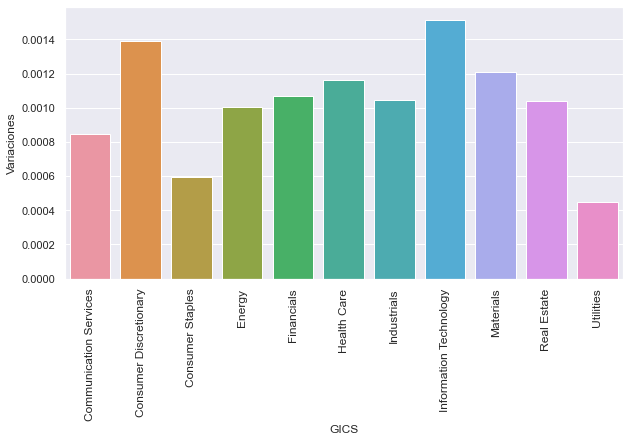

In [31]:
plt.xticks(fontsize=12,rotation=90)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data= dataGicsultimos2, x = 'GICS', y = "Variaciones")
plt.show()

Por lo que recomendaria teniendo en cuenta estas graficas la inversion en empresas de estas industrias: Information Technology y Consumer Discretionary ya que son empresas que vienen demostrando crecimiento.

### 4. MOMENTOS DE ALTA VOLATILIDAD QUE AFECTARON AL SP500

In [32]:
#Agrupo por fecha y paso como columnas todas las columnas calculadas
#con su media
datavolatilidad=data.groupby("Date").agg({'GAP':'mean',
        'Intradiario':'mean','Variaciones':'mean','Volatilidad':'mean'})

In [33]:
datavolatilidad= datavolatilidad.reset_index()

In [34]:
datavolatilidad

,Date,GAP,Intradiario,Variaciones,Volatilidad
0,1999-12-31 00:00:00,0.000000,0.000000,0.000000,30.885813
1,2000-01-03 00:00:00,0.000000,-0.019089,-0.012617,28.268514
2,2000-01-04 00:00:00,-0.011625,-0.015643,-0.026377,28.381229
3,2000-01-05 00:00:00,-0.001288,0.007180,0.006559,28.517000
4,2000-01-06 00:00:00,-0.002026,0.006580,0.005413,28.748934
...,...,...,...,...,...
5532,2021-12-23 00:00:00,0.003613,0.003094,0.006778,27.910219
5533,2021-12-27 00:00:00,0.001478,0.011182,0.012847,27.931855
5534,2021-12-28 00:00:00,-0.000023,0.001370,0.001388,27.923325
5535,2021-12-29 00:00:00,0.000329,0.002501,0.002873,27.902970


En el siguiente grafico se puede observar el comportamiento de la volatilidad en los ultimos 20 años

In [35]:
fig = px.line(datavolatilidad, x='Date', y='Volatilidad', color_discrete_sequence=["darkblue"])
fig.show()

Esto mismo se puede observar en el comportamiento de los retornos, como por ejemplo en el intradiario

In [36]:
fig = px.line(datavolatilidad, x='Date', y='Intradiario', color_discrete_sequence=["darkblue"])
fig.show()

Se pueden observar 2 periodos de gran volatilidad en el 2008 donde se dio una crisis financiera global y en el año 2020 con la pandemia de COVID-19.
Se puede observar tambien un pico en septiembre de 2011.

In [37]:
datavolatilidadfil = datavolatilidad.sort_values("Volatilidad", ascending=False)
datavolatilidadfil = datavolatilidadfil.drop(columns=['GAP','Intradiario','Variaciones'])

In [38]:
#Pico mas alto de volatilidad 
datavolatilidadfil.head(1)

,Date,Volatilidad
427,2001-09-12 00:00:00,102.688407


### 5. MEJORES 9 EMPRESAS PARA INVERTIR

Para analizar las mejores 9 empresas para invertir aplico un filtro por los ultimos 2 años y calculo el promedio de las variaciones de los cierres ajustados entre la el primer dia del periodo y el ultimo:

In [39]:
dataempresa2=ultimos2anios
top9 = dataempresa2
top9=top9.drop(['Open','High','Low','Close','Volume','dia_semana',
            'Intradiario','GAP','Variaciones','Volatilidad'], axis=1)
fechaminima_top9 = top9[top9["Date"] == top9["Date"].min()]
fechamaxima_top9 = top9[top9["Date"] == top9["Date"].max()]
diferenciafechas2 = pd.merge(fechaminima_top9,fechamaxima_top9, 
                             on=["Ticker"])
diferenciafechas2["Variacion_Porcentual"] = diferenciafechas2.apply(lambda row: 
            (((row["Adj Close_y"]/row["Adj Close_x"])-1)*100), axis = 1).fillna(0)
diferenciafechas2 = diferenciafechas2.sort_values("Variacion_Porcentual",
                                                  ascending=False)
diferenciafechas2 = diferenciafechas2.drop(columns=['Date_x',
                'Adj Close_x','Date_y','Adj Close_y','GICS_y'])
diferenciafechas2 = diferenciafechas2.rename(columns={'GICS_x':'GICS'})
diferenciafechas2 = diferenciafechas2.head(9)

Dando como resultado las siguientes 9 empresas como las mejores para invertir, entre ellas 3 de Information Technology, 3 de Consumer Discretionary

In [40]:
diferenciafechas2

,Ticker,GICS,Variacion_Porcentual
311,MRNA,Health Care,1186.298635
436,TSLA,Consumer Discretionary,1179.300984
168,ENPH,Information Technology,613.394603
342,NVDA,Information Technology,404.219261
177,ETSY,Consumer Discretionary,401.151238
60,BBWI,Consumer Discretionary,384.954756
208,GNRC,Industrials,250.889755
199,FTNT,Information Technology,236.998893
17,ALB,Materials,228.927576


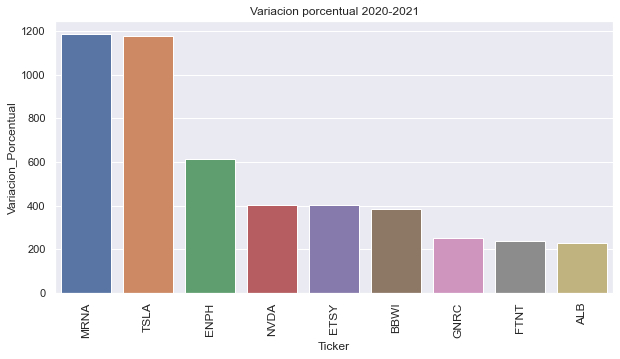

In [41]:
plt.xticks(fontsize=12,rotation=90)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data= diferenciafechas2, x = 'Ticker', y = "Variacion_Porcentual").set(title="Variacion porcentual 2020-2021")
plt.show()